# Exploratory Data Analysis(EDA) for MovieLens Dataset

####  Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### Load the Datasets and view the Datasets

In [4]:
df1 = pd.read_csv("E:\movie_recommendation\src\data\movie.csv")
df1.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


#### We use the `rating.csv` dataset for Collaborative Filtering 

In [5]:
rating_df = pd.read_csv("E:\\movie_recommendation\\src\\data\\rating.csv")
rating_df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [7]:
df3 = pd.read_csv("E:\\movie_recommendation\\src\\data\\tag.csv")
df3.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [10]:
df4 = pd.read_csv("E:\\movie_rec\\src\\data\\link.csv")
df4.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [12]:
df5 = pd.read_csv("E:\\movie_rec\\src\\data\\genome_tags.csv")
df5.head()

,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s


#### Analysing the `rating.csv` file to understand the patterns and the data

In [8]:
rating_df.shape

(100836, 4)

In [9]:
rating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [10]:
rating_df.isna().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [11]:
rating_df.duplicated().sum()

0

In [12]:
rating_df.nunique()

userId         610
movieId       9724
rating          10
timestamp    85043
dtype: int64

In [13]:
rating_df.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [14]:
rating_df = rating_df.drop('timestamp', axis=1)

#### Plotting the Distribution of Ratings using `sns.countplot()`

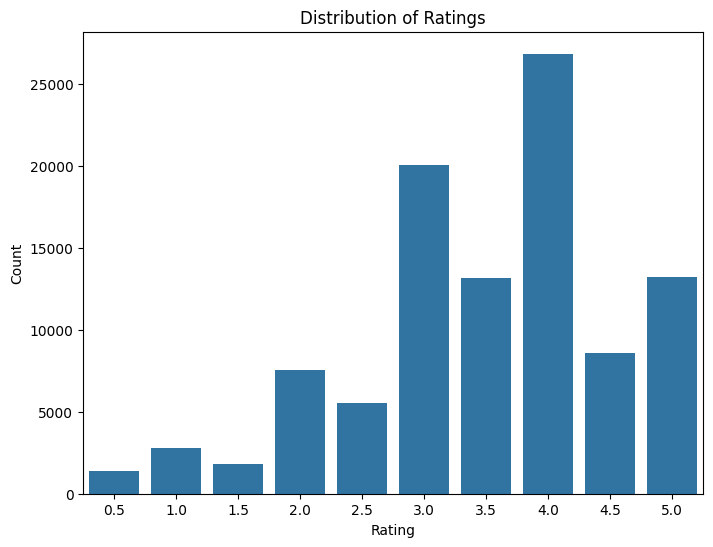

In [15]:
plt.figure(figsize=(8, 6))
sns.countplot(x='rating', data=rating_df)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

#### Plotting the Number of Ratings per User using `sns.histplot()`

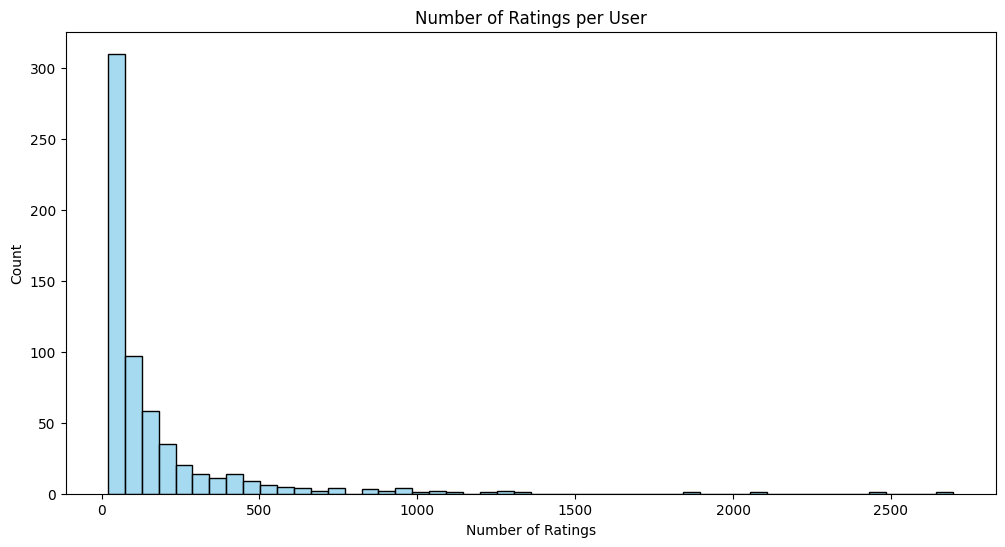

In [16]:
user_ratings_count = rating_df.groupby('userId')['rating'].count()
plt.figure(figsize=(12, 6))
sns.histplot(user_ratings_count, bins=50, kde=False, color='skyblue')
plt.title('Number of Ratings per User')
plt.xlabel('Number of Ratings')
plt.ylabel('Count')
plt.show()

### Conclusion: 
#### The Conclusion that we can draw from EDA is that we have over 100k data in rating.csv file so we have to Train our model on a smaller fraction. 
#### Also, We have an additional column `timestamp` that we don't have to use so we have to drop that column and proceed.
#### There are no null values so it doesn't affect our Collaborative Filtering model.